In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
torch.__version__

'2.6.0+cu124'

In [3]:
np.__version__

'2.0.1'

In [4]:
# set the random seed
torch.manual_seed(316)

---

In [5]:
# convert to tensor and normalize
transform = transforms.Compose(
 [
 transforms.ToTensor(),
 transforms.Normalize((0.5,), (0.5,)),
 ]
)

In [6]:
trainset = datasets.MNIST('.', download=True, train=True, transform=transform)

In [7]:
len(trainset)

60000

In [8]:
# load the training data
batch_size = 64
trainloader = torch.utils.data.DataLoader(
 trainset,
 batch_size=batch_size,
 shuffle=True
)

---

In [9]:
images, labels = next(iter(trainloader))

In [10]:
# batch * channel * width * height
print(type(images))
print(images.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])


In [11]:
image1 = images[0]

In [12]:
# channel * width * height
image1.shape

torch.Size([1, 28, 28])

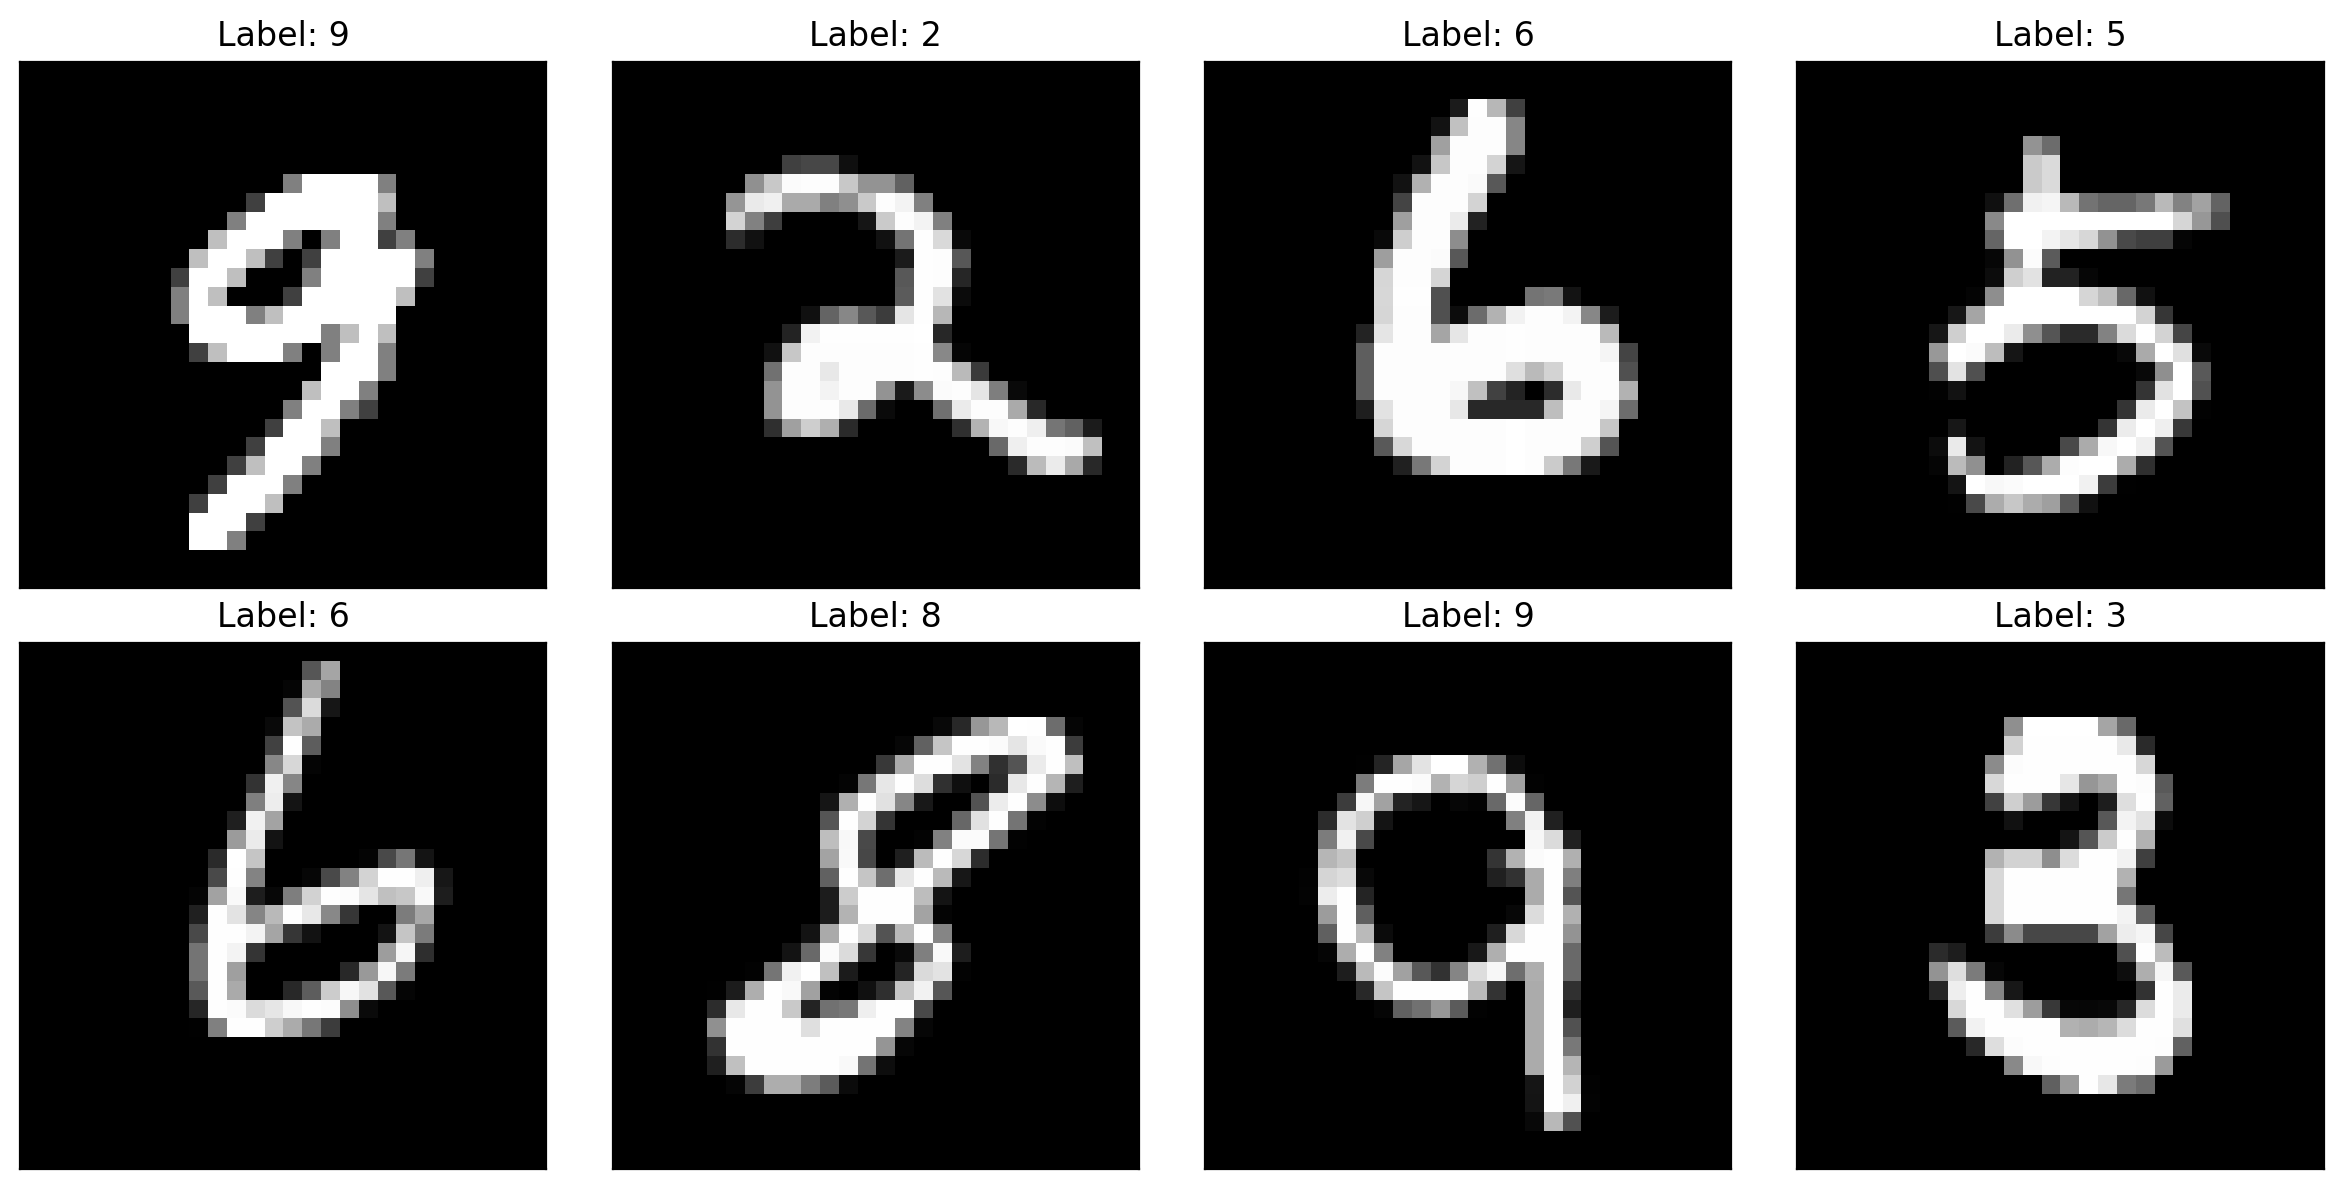

In [13]:
# first 8 images in the first batch
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
ax = np.ravel(ax)
for index in range(8):
    image = images[index]
    label = labels[index]
    ax[index].imshow(image.squeeze(), cmap='gray', interpolation='none')
    ax[index].set_title(f"Label: {label}")
    ax[index].set_xticks([])
    ax[index].set_yticks([])
plt.tight_layout()
plt.show()

---

In [14]:
from torch import nn

In [15]:
model = nn.Sequential(
    nn.Linear(784, 256),
    nn.Sigmoid(),
    nn.Linear(256, 10),
    # nn.Softmax(dim=1)
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=256, out_features=10, bias=True)
)


In [16]:
model[0].weight

Parameter containing:
tensor([[ 0.0324,  0.0152, -0.0179,  ...,  0.0019, -0.0256, -0.0322],
        [ 0.0124,  0.0004, -0.0121,  ..., -0.0236,  0.0156, -0.0336],
        [ 0.0038,  0.0217, -0.0071,  ..., -0.0341,  0.0129, -0.0124],
        ...,
        [ 0.0339,  0.0036, -0.0220,  ..., -0.0028, -0.0137, -0.0067],
        [ 0.0310, -0.0252,  0.0159,  ...,  0.0085,  0.0029, -0.0307],
        [ 0.0336,  0.0165, -0.0199,  ..., -0.0140,  0.0205,  0.0229]],
       requires_grad=True)

In [17]:
model[0].weight.shape

torch.Size([256, 784])

In [18]:
model[0].bias

Parameter containing:
tensor([-0.0337, -0.0261, -0.0216, -0.0347, -0.0071,  0.0335, -0.0279, -0.0200,
         0.0173,  0.0275,  0.0108, -0.0266,  0.0027,  0.0330,  0.0056, -0.0129,
        -0.0270,  0.0176, -0.0201, -0.0266, -0.0276,  0.0313, -0.0203,  0.0356,
         0.0254,  0.0079, -0.0268, -0.0100, -0.0183,  0.0172, -0.0274, -0.0108,
        -0.0030, -0.0026,  0.0353,  0.0089,  0.0303, -0.0346,  0.0205, -0.0132,
        -0.0296,  0.0021,  0.0354,  0.0334,  0.0044, -0.0152,  0.0056,  0.0075,
        -0.0086,  0.0327, -0.0238, -0.0274,  0.0091,  0.0246, -0.0280,  0.0011,
         0.0277, -0.0132, -0.0345,  0.0333,  0.0099, -0.0285, -0.0170,  0.0211,
         0.0078,  0.0347,  0.0031,  0.0125,  0.0305, -0.0289,  0.0212, -0.0355,
         0.0294,  0.0315, -0.0104,  0.0022,  0.0257,  0.0024, -0.0352,  0.0007,
        -0.0082, -0.0337, -0.0321,  0.0152,  0.0342,  0.0150,  0.0352,  0.0038,
         0.0161, -0.0218,  0.0110, -0.0036,  0.0307,  0.0342, -0.0116,  0.0332,
        -0.0164, -

In [19]:
model[0].bias.shape

torch.Size([256])

In [20]:
model[1]

Sigmoid()

In [21]:
model[2].weight

Parameter containing:
tensor([[-0.0510, -0.0538, -0.0362,  ..., -0.0546,  0.0276, -0.0249],
        [ 0.0563,  0.0067,  0.0622,  ...,  0.0416, -0.0206, -0.0143],
        [ 0.0085, -0.0379, -0.0275,  ..., -0.0508,  0.0019,  0.0379],
        ...,
        [ 0.0465, -0.0079, -0.0399,  ...,  0.0349,  0.0273, -0.0566],
        [ 0.0026, -0.0263,  0.0590,  ...,  0.0431, -0.0623,  0.0084],
        [ 0.0086,  0.0273,  0.0114,  ...,  0.0020, -0.0580,  0.0096]],
       requires_grad=True)

In [22]:
model[2].weight.shape

torch.Size([10, 256])

In [23]:
model[2].bias

Parameter containing:
tensor([-0.0312,  0.0159, -0.0588, -0.0381,  0.0019, -0.0118, -0.0202, -0.0624,
        -0.0579,  0.0146], requires_grad=True)

In [24]:
model[2].bias.shape

torch.Size([10])

---

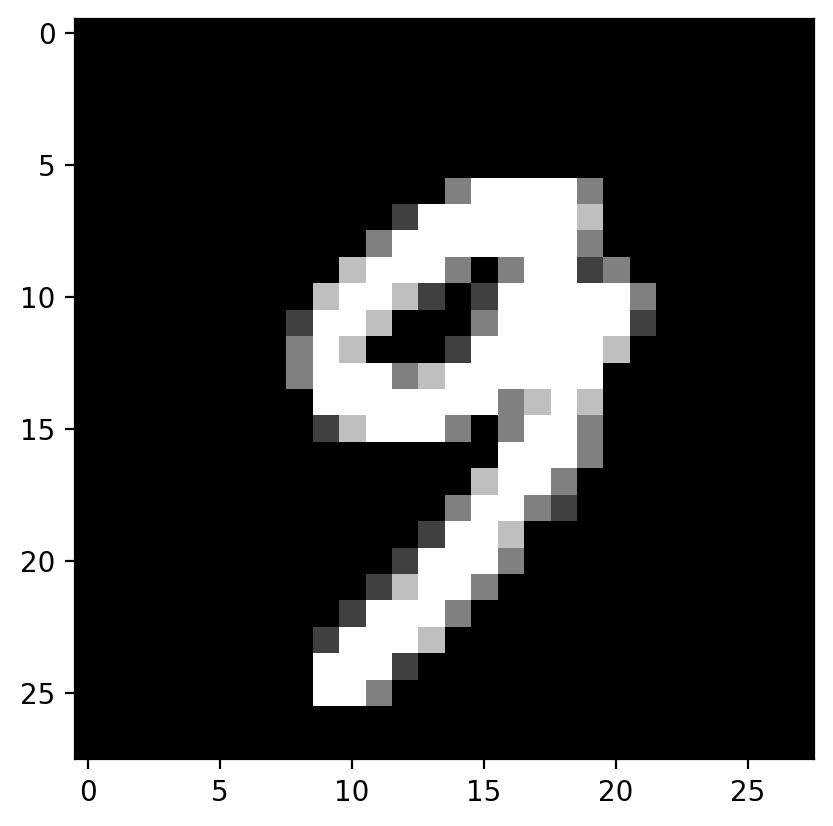

In [25]:
plt.imshow(image1.squeeze(), cmap="gray");

In [26]:
flatten_image1 = image1.view(1, 784)
# flatten
# 1 x 28 x 28 --> 1 x 784

In [27]:
logits = model.forward(flatten_image1)

In [28]:
logits

tensor([[-8.8301e-01, -2.3194e-01,  4.1791e-02, -3.2855e-01,  3.0582e-01,
         -1.2567e-01,  5.7616e-02, -2.5200e-01,  5.0664e-04,  2.3618e-01]],
       grad_fn=<AddmmBackward0>)

In [29]:
logits.shape

torch.Size([1, 10])

In [30]:
# this is not probabilities
torch.sum(logits)

tensor(-1.1792, grad_fn=<SumBackward0>)

In [31]:
# softmax to convert logits into probabilities
probabilities = logits.softmax(dim=1)

In [32]:
# note that it's an object, not just a bunch of numbers
print(probabilities)

tensor([[0.0444, 0.0852, 0.1120, 0.0773, 0.1458, 0.0947, 0.1138, 0.0835, 0.1074,
         0.1360]], grad_fn=<SoftmaxBackward0>)


In [33]:
# `.data` to just get the numbers
probabilities.data

tensor([[0.0444, 0.0852, 0.1120, 0.0773, 0.1458, 0.0947, 0.1138, 0.0835, 0.1074,
         0.1360]])

In [34]:
# convert to numpy array
probabilities.data.numpy()

array([[0.04440752, 0.08515558, 0.11196769, 0.0773137 , 0.14580108,
        0.09470376, 0.11375376, 0.08346453, 0.10743934, 0.13599303]],
      dtype=float32)

In [35]:
probabilities.data.numpy().shape

(1, 10)

In [36]:
# convert tensor to plain old list so that we can plot the numbers
probabilities = probabilities.data.numpy().squeeze()
probabilities.shape

(10,)

In [37]:
print(probabilities)

[0.04440752 0.08515558 0.11196769 0.0773137  0.14580108 0.09470376
 0.11375376 0.08346453 0.10743934 0.13599303]


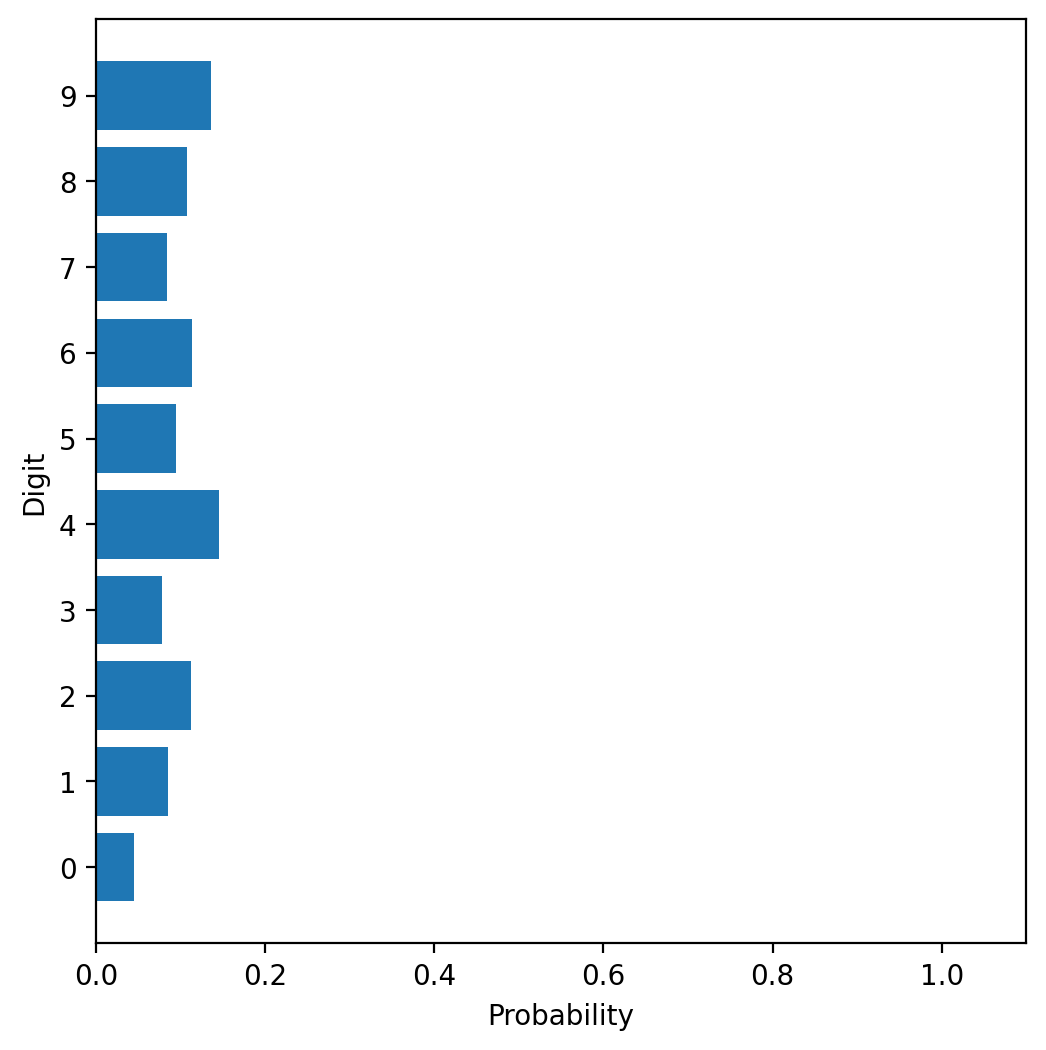

In [38]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.barh(np.arange(10), probabilities)
ax.set_yticks(np.arange(10))
ax.set_xlim(0, 1.1)
ax.set_xlabel("Probability")
ax.set_ylabel("Digit")
plt.show()

---

In [39]:
# define the loss
criterion = nn.CrossEntropyLoss()
# feed a batch of images
logits = model.forward(images.view(-1, 784))
# compute the loss with the logits and the labels
loss = criterion(logits, labels)
print(loss)

tensor(2.3330, grad_fn=<NllLossBackward0>)


In [40]:
# to get the loss value only
print(loss.item())

2.3329858779907227


---

In [41]:
from torch import optim
# set up an optimizer (pass parameters to be optimized and a learning rat
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [42]:
# define the loss
criterion = nn.CrossEntropyLoss()
# feed a batch of images
logits = model.forward(images.view(-1, 784))
# compute the loss with the logits and the labels
loss = criterion(logits, labels)
print(loss)

tensor(2.3330, grad_fn=<NllLossBackward0>)


In [43]:
loss.backward()

In [44]:
# update weights
optimizer.step()

In [45]:
images.shape

torch.Size([64, 1, 28, 28])

In [ ]:
%%time
epochs = 10
for epoch in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader:
        # zero the gradients on each training pass
        optimizer.zero_grad()
        # make a forward pass through the network
        logits = model.forward(images.view(-1, 784))
        # use the network output to calculate the loss (output vs. ground
        loss = criterion(logits, labels)
        # make a backward pass through the network to calculate the gradi
        loss.backward()
        # update the weights
        optimizer.step()
        # keep track of the loss per epoch
        running_loss += loss.item()
    else:
        print(f"Epoch: {epoch+1:02} / Training Loss: {running_loss/len(trainloader):.4f}")

Epoch: 01 / Training Loss: 1.6960
Epoch: 02 / Training Loss: 0.8195
Epoch: 03 / Training Loss: 0.5698
Epoch: 04 / Training Loss: 0.4743
Epoch: 05 / Training Loss: 0.4243


---

In [ ]:
images, labels = next(iter(trainloader))
img_to_test = images[0]

In [ ]:
plt.imshow(img_to_test.squeeze(), cmap="gray");

In [ ]:
# disable gradients
# no need to compute
with torch.no_grad():
    logits = model.forward(img_to_test.view(1, 784))
# softmax to convert logits into probabilities
probabilities = logits.softmax(dim=1)

In [ ]:
# tensor to list
probabilities = probabilities.data.numpy().squeeze()
print(probabilities)

In [ ]:
probabilities.round(3)

In [ ]:
np.sum(probabilities)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

# horizontal bar chart
bars = ax.barh(np.arange(10), probabilities)

# labels and limits
ax.set_yticks(np.arange(10))
ax.set_xlim(0, 1.1)
ax.set_xlabel("Probability")
ax.set_ylabel("Digit")

# add text annotations
for bar in bars:
    width = bar.get_width() # get the bar width (the probability value)
    ax.text(
        width + 0.02, # position the text slightly to the right of the b
        bar.get_y() + bar.get_height() / 2, # center the text vertically
        f'{width:.3f}',
        va='center'
    )
plt.show()

In [ ]:
print(probabilities)
print("max =", np.max(probabilities)) # or probabilities.max()

In [ ]:
print(probabilities)
print("index of max =", np.argmax(probabilities)) # or probabilities.arg

---

In [ ]:
testset = datasets.MNIST('.', download=True, train=True, transform=transform)

In [ ]:
len(testset)

In [ ]:
# load the training data
batch_size = 64
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=True
)

In [ ]:
# get the first batch from testset
images, labels = next(iter(testloader))
# get the first image from the first batch
img_to_test = images[0]

In [ ]:
answer = labels[0]

In [ ]:
plt.imshow(img_to_test.squeeze(), cmap="gray");

In [ ]:
# vs. model.train()
model.eval()

In [ ]:
with torch.no_grad():
    logits = model.forward(img_to_test.view(1, 784))
probabilities = logits.softmax(dim=1)

In [ ]:
probabilities = probabilities.data.numpy().squeeze()
print(probabilities)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
# horizontal bar chart
bars = ax.barh(np.arange(10), probabilities)
# labels and limits
ax.set_yticks(np.arange(10))
ax.set_xlim(0, 1.1)
ax.set_xlabel("Probability")
ax.set_ylabel("Digit")
# add text annotations
for bar in bars:
    width = bar.get_width() # get the bar width (the probability value)
    ax.text(
    width + 0.02, # position the text slightly to the right of the b
    bar.get_y() + bar.get_height() / 2, # center the text vertically
    f'{width:.3f}',
    va='center'
)
plt.show()

In [ ]:
result = np.argmax(probabilities)

In [ ]:
result

---

In [ ]:
model.training

In [ ]:
with torch.no_grad():
    # forward pass
    logits = model(images.view(-1, 784))
    # softmax 확률 대신 argmax로 바로 클래스 예측
    predictions = torch.argmax(logits, dim=1)

# 정답과 비교
correct = (predictions == labels).sum().item()
total = labels.size(0)
accuracy = correct / total * 100

print(f"배치 크기: {total}")
print(f"정답 개수: {correct}")
print(f"정확도: {accuracy:.2f}%")

# ❌ 틀린 인덱스 확인
wrong_idx = (predictions != labels).nonzero(as_tuple=True)[0]
print("틀린 인덱스:", wrong_idx.tolist())

# 틀린 케이스 몇 개 예시 출력
for idx in wrong_idx[:5]:  # 앞에서 5개만 출력
    print(f"Index {idx.item()} → 예측: {predictions[idx].item()}, 정답: {labels[idx].item()}")